<h1>GOAL 2: From Lipinski Features, Predict Drug-likeness</h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,2440.0,intermediate
4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,2540.0,intermediate
4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,3810.0,intermediate
4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,3460.0,intermediate


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

<h2>Adding Features</h2>

RDKit has Lipinski module which provides descriptor method.

<div>
    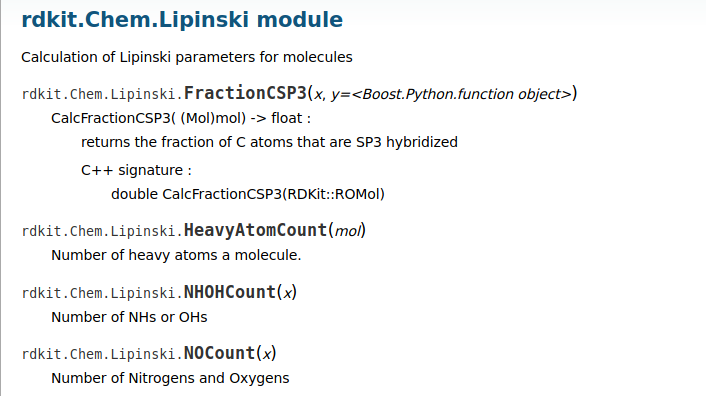
</div>

In [4]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
# function for getting lipinski descriptors

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [5]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
4690,511.150,7.07230,2.0,3.0
4691,511.150,7.07230,2.0,3.0
4692,555.601,7.18140,2.0,3.0
4693,521.702,6.32710,2.0,5.0


In [6]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined.to_csv('acetylcholinesterase_bioactivity_data_3class.csv', index=False)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.80320,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.55460,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.35740,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.70690,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.09530,0.0,6.0
...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,2440.0,intermediate,511.150,7.07230,2.0,3.0
4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,2540.0,intermediate,511.150,7.07230,2.0,3.0
4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,3810.0,intermediate,555.601,7.18140,2.0,3.0
4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,3460.0,intermediate,521.702,6.32710,2.0,5.0


In [7]:
lipinski_3class = df_combined.drop(columns=['molecule_chembl_id', 'canonical_smiles', 'standard_value'], axis=1)
lipinski_3class

,class,MW,LogP,NumHDonors,NumHAcceptors
0,active,312.325,2.80320,0.0,6.0
1,active,376.913,4.55460,0.0,5.0
2,inactive,426.851,5.35740,0.0,5.0
3,active,404.845,4.70690,0.0,5.0
4,active,346.334,3.09530,0.0,6.0
...,...,...,...,...,...
4690,intermediate,511.150,7.07230,2.0,3.0
4691,intermediate,511.150,7.07230,2.0,3.0
4692,intermediate,555.601,7.18140,2.0,3.0
4693,intermediate,521.702,6.32710,2.0,5.0


<h2>Data Analysis</h2>

In [8]:
lipinski_3class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   class          4695 non-null   object 
 1   MW             4695 non-null   float64
 2   LogP           4695 non-null   float64
 3   NumHDonors     4695 non-null   float64
 4   NumHAcceptors  4695 non-null   float64
dtypes: float64(4), object(1)
memory usage: 183.5+ KB


In [9]:
lipinski_3class.describe()

,MW,LogP,NumHDonors,NumHAcceptors
count,4695.000000,4695.000000,4695.000000,4695.000000
mean,415.677588,3.996489,1.130351,4.373589
std,129.938801,2.510010,1.093443,1.888268
min,61.040000,-6.615100,0.000000,0.000000
25%,332.844000,2.622600,0.000000,3.000000
50%,401.212000,4.113800,1.000000,4.000000
75%,484.611000,5.406450,2.000000,6.000000
max,1235.463000,13.506800,10.000000,16.000000


In [10]:
lipinski_3class['class'].value_counts()

active          2039
inactive        1510
intermediate    1146
Name: class, dtype: int64

In [11]:
X = lipinski_3class.drop('class', axis=1)
y = lipinski_3class['class']

In [12]:
print(X.shape)
print(y.shape)

(4695, 4)
(4695,)


Similar to what we did in the previous notebook, we need to change the type of 'class'.

In [13]:
lipinski_3class['class'].replace({'inactive': -1, 'intermediate': 0, 'active': 1}, inplace=True)

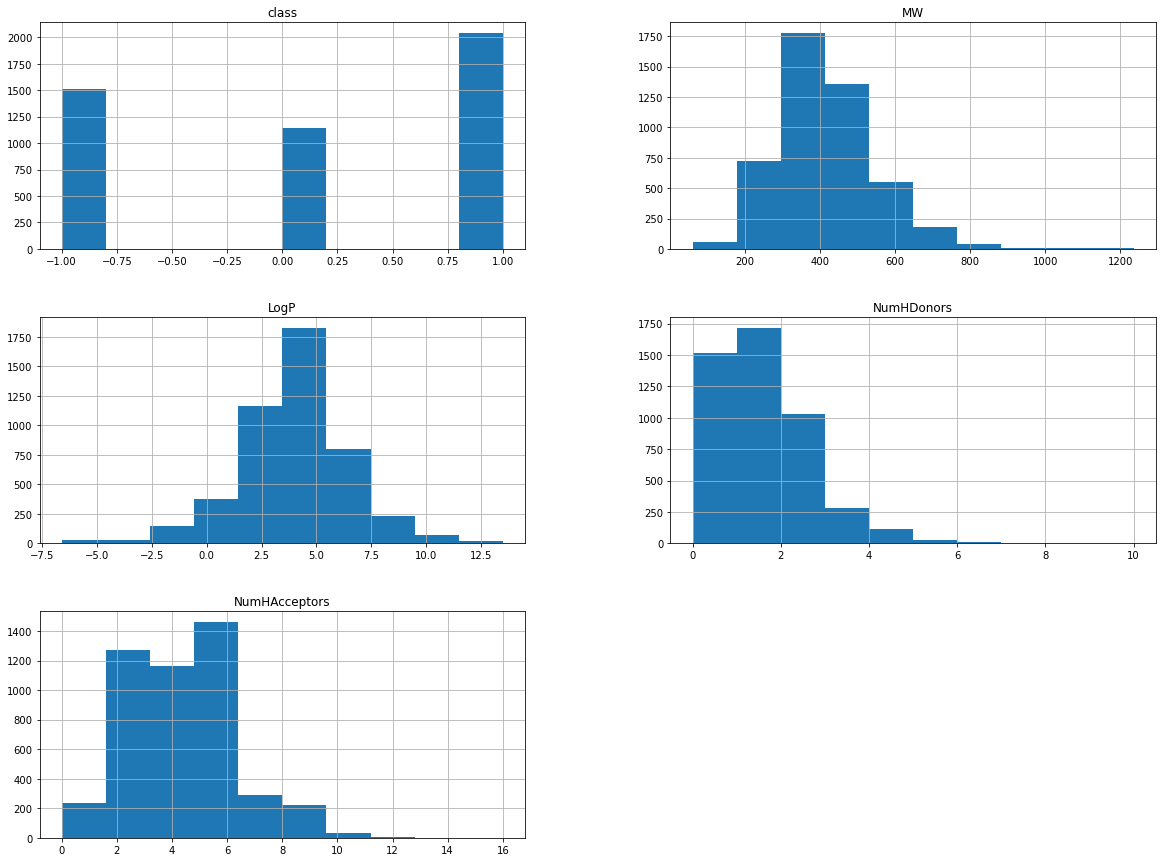

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

lipinski_3class.hist(bins=10, figsize=(20,15))
#save_fig("lipinski_attribute_histogram_plots")
plt.show()

array([[<AxesSubplot:xlabel='class', ylabel='class'>,
        <AxesSubplot:xlabel='MW', ylabel='class'>,
        <AxesSubplot:xlabel='LogP', ylabel='class'>,
        <AxesSubplot:xlabel='NumHDonors', ylabel='class'>,
        <AxesSubplot:xlabel='NumHAcceptors', ylabel='class'>],
       [<AxesSubplot:xlabel='class', ylabel='MW'>,
        <AxesSubplot:xlabel='MW', ylabel='MW'>,
        <AxesSubplot:xlabel='LogP', ylabel='MW'>,
        <AxesSubplot:xlabel='NumHDonors', ylabel='MW'>,
        <AxesSubplot:xlabel='NumHAcceptors', ylabel='MW'>],
       [<AxesSubplot:xlabel='class', ylabel='LogP'>,
        <AxesSubplot:xlabel='MW', ylabel='LogP'>,
        <AxesSubplot:xlabel='LogP', ylabel='LogP'>,
        <AxesSubplot:xlabel='NumHDonors', ylabel='LogP'>,
        <AxesSubplot:xlabel='NumHAcceptors', ylabel='LogP'>],
       [<AxesSubplot:xlabel='class', ylabel='NumHDonors'>,
        <AxesSubplot:xlabel='MW', ylabel='NumHDonors'>,
        <AxesSubplot:xlabel='LogP', ylabel='NumHDonors'>,
       

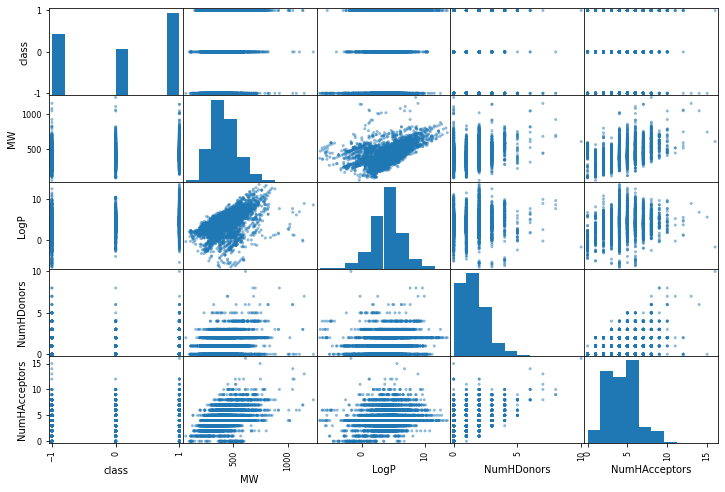

In [15]:
from pandas.plotting import scatter_matrix

attributes = ['class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
scatter_matrix(lipinski_3class[attributes], figsize=(12, 8))

<h2>Split a dataset into a train set and a test set</h2>

As I pointed out in the previous notebook, randomly sampling data using train_test_split() can be skewed.
For example, the ratio of female and male in America is about 51:49. If I blidly selected samples from a phone book, it would be very likely the samples are biased.
It would be better to do sampling that matches the actual ratio.<br>
To do that, I will use StratifiedShuffleSplit. It will split the data set corresponding to the ratio.

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

<h4>Random Forest Classifier</h4>

In [17]:
# again, find a hyperparameter combination that performs the best
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
   {
       'n_estimators': [200, 500],
       'max_features': ['auto', 'sqrt', 'log2'],
       'max_depth': [4, 5, 6, 7, 8],
       'criterion': ['gini', 'entropy']
   }
]

randForest_clf = RandomForestClassifier()
grid_search_randForest = GridSearchCV(randForest_clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search_randForest.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [200, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [18]:
grid_search_randForest.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [19]:
cvres = grid_search_randForest.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.1160011368958216 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
1.1121784103730776 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
1.1117006806077496 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
1.1099013002936169 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
1.1119390934168218 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
1.1097819611797124 {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
1.092126933388321 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
1.0915177952101334 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
1.0898106894627735 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}
1.0941978293285637 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n

To see which features have important information, I will use feature_importances_ method. <br>
This method returns an array of importance scores.

<h2>Features Tuning</h2>

In [20]:
feature_importances = grid_search_randForest.best_estimator_.feature_importances_
feature_importances

array([0.34422482, 0.39966791, 0.1120963 , 0.14401097])

In [21]:
attributes = X.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.399667910375374, 'LogP'),
 (0.3442248203010163, 'MW'),
 (0.14401097124363912, 'NumHAcceptors'),
 (0.11209629807997062, 'NumHDonors')]

<h3>Add more Features (manipulating the data)</h3>

Since Number of H acceptors and Number of H donors do not provide much useful information, I'd like to manipulate these two and produce more important attributes. <br>
I calculate the number of H acceptors per molecular weight and the number of H donors per molecular weight.
Let's check if these have greater feature importance scores.

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = 'NumHDonors', 'NumHAcceptors', 'MW' 
NumHDonors_ix, NumHAcceptors_ix, MW_ix = [
    X.columns.get_loc(c) for c in col_names
]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_NumHDonors_per_MW=True):
        self.add_NumHDonors_per_MW = add_NumHDonors_per_MW
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        NumHAcceptors_per_MW = X[:, NumHAcceptors_ix] / X[:, MW_ix]
        if self.add_NumHDonors_per_MW:
            NumHDonors_per_MW = X[:, NumHDonors_ix] / X[:, MW_ix]
            return np.c_[X, NumHDonors_per_MW, NumHAcceptors_per_MW]
        else:
            return np.c_[X, NumHAcceptors_per_MW]

attr_adder = CombinedAttributesAdder(add_NumHDonors_per_MW=True)
lipinski_extra_attribs = attr_adder.transform(X_train.values)

In [23]:
lipinski_extra_attribs = pd.DataFrame(
    lipinski_extra_attribs, 
    columns=list(X_train.columns) + ['NumHDonors_per_MW', 'NumHAcceptors_per_MW'], index=X_train.index)
lipinski_extra_attribs

,MW,LogP,NumHDonors,NumHAcceptors,NumHDonors_per_MW,NumHAcceptors_per_MW
2314,406.907,6.60900,2.0,2.0,0.004915,0.004915
3064,679.780,11.94640,2.0,4.0,0.002942,0.005884
1824,282.391,3.03980,1.0,4.0,0.003541,0.014165
1458,444.575,5.52690,0.0,4.0,0.000000,0.008997
40,380.876,2.10500,3.0,6.0,0.007877,0.015753
...,...,...,...,...,...,...
2612,405.498,4.64162,1.0,6.0,0.002466,0.014797
3130,407.598,6.64390,0.0,3.0,0.000000,0.007360
4631,292.290,3.66944,0.0,4.0,0.000000,0.013685
2756,373.316,0.74630,5.0,5.0,0.013393,0.013393


In [24]:
grid_search_randForest.fit(lipinski_extra_attribs, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [200, 500]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
feature_importances = grid_search_randForest.best_estimator_.feature_importances_
attributes = lipinski_extra_attribs.columns
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2981131285969465, 'LogP'),
 (0.2443155110399311, 'MW'),
 (0.18562588203761246, 'NumHAcceptors_per_MW'),
 (0.13411857841429786, 'NumHDonors_per_MW'),
 (0.08033057490308153, 'NumHAcceptors'),
 (0.05749632500813038, 'NumHDonors')]

Hooray! My guess was right! Now we got more important attributes than 'NumHAccepors' and 'NumHDonors'.<br>
Let's add these two attributes to the data table.

In [26]:
attr_adder = CombinedAttributesAdder(add_NumHDonors_per_MW=True)
X_test_extra = attr_adder.transform(X_test.values)

X_test_extra = pd.DataFrame(
    X_test_extra,
    columns=list(X_test.columns) + ['NumHDonors_per_MW', 'NumHAcceptors_per_MW'], index=X_test.index)
X_test_extra

,MW,LogP,NumHDonors,NumHAcceptors,NumHDonors_per_MW,NumHAcceptors_per_MW
0,312.325,2.8032,0.0,6.0,0.000000,0.019211
7,408.955,4.5712,0.0,6.0,0.000000,0.014672
4217,509.647,4.0432,2.0,6.0,0.003924,0.011773
1009,267.373,0.5515,0.0,3.0,0.000000,0.011220
826,257.333,3.1902,0.0,2.0,0.000000,0.007772
...,...,...,...,...,...,...
3647,351.858,5.7120,0.0,2.0,0.000000,0.005684
1786,460.530,4.9554,1.0,6.0,0.002171,0.013028
3515,454.563,4.3373,2.0,6.0,0.004400,0.013199
1223,387.479,5.2372,0.0,4.0,0.000000,0.010323


In [27]:
X_train = lipinski_extra_attribs.copy()
X_test = X_test_extra.copy()

In [28]:
from sklearn.model_selection import cross_val_score

y_train_pred = cross_val_score(grid_search_randForest, X_train, y_train, cv=3, scoring='accuracy')

In [29]:
y_train_pred

array([0.55351438, 0.5471246 , 0.55830671])

<h4>KNN Classifier</h4>

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# param_grid = [
#    {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5, 7, 10, 15]}
# ]

knn_clf = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.46565495, 0.45926518, 0.46964856])

<h4>SGD Classifier</h4>

In [31]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.44009585, 0.2571885 , 0.45447284])

<h4>Gradient Boosting Classifier</h4>

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
cross_val_score(gb_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.52635783, 0.52476038, 0.55271565])

<h4>Decision Tree Classifier</h4>

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
cross_val_score(tree_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.52795527, 0.53194888, 0.52236422])

The accuracy scores for the above classifier models are very low. It is hard to say it performs any better than a random classifier. <br>
Let's do feature scaling.

<h3>Standardization</h3>

In [34]:
# remove outliers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(grid_search_randForest, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.54392971, 0.5471246 , 0.56549521])

Still, the result is not great. The next thing we can do is to simplify the problem. <br>
So far, we have dealt with multi classification problem. There are three classes; inactive, intermediate and active. Let's make the problem classify an input as either active or inactive.

<h2>Binary-class Classfication</h2>

<h3>Simplify the Problem: Exclude 'intermediate' labeled data</h3>

In [35]:
lipinski_2class = df_combined[df_combined['class'] != 'intermediate']
lipinski_2class.to_csv('acetylcholinesterase_bioactivity_data_2class.csv', index=None)
lipinski_2class

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
4675,CHEMBL4284261,CCN(C)Cc1cc(N)ccc1O.Cl.Cl,965100.0,inactive,253.173,2.2697,2.0,3.0
4676,CHEMBL4276921,CN(C)Cc1cc(N)ccc1O.Cl.Cl,1536500.0,inactive,239.146,1.8796,2.0,3.0
4677,CHEMBL4292574,CNCc1cc(N)ccc1O.Cl.Cl,333500.0,inactive,225.119,1.5374,3.0,3.0
4685,CHEMBL4292766,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3F)CC2...,750.0,active,494.695,6.5580,2.0,3.0


In [36]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

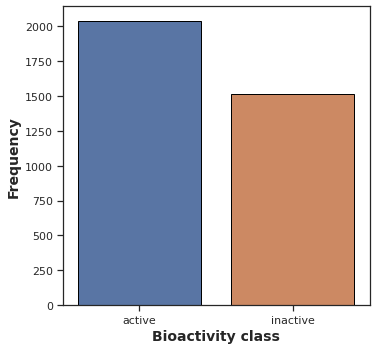

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=lipinski_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# plt.savefig('plot_bioactivity_class.pdf')

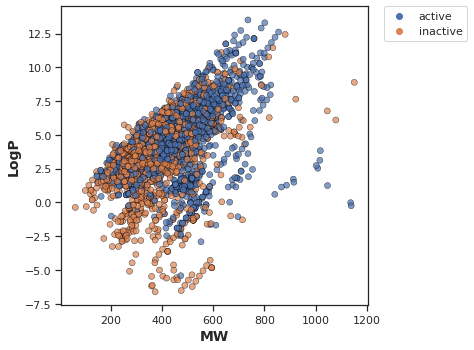

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=lipinski_2class, hue='class', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

<h3>Mann-Whitney U Test</h3>

To check if a feature has a valuable information to predict the label.

In [41]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = lipinski_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = lipinski_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

Text(0, 0.5, 'MW')

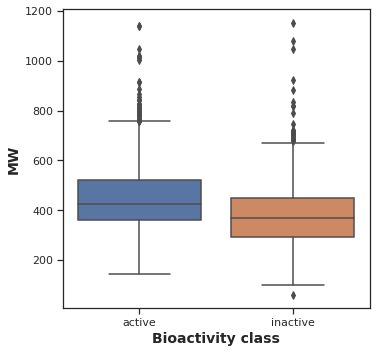

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = lipinski_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

# plt.savefig('plot_MW.pdf')

In [44]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1996258.5,9.341054e-52,0.05,Different distribution (reject H0)


Text(0, 0.5, 'LogP')

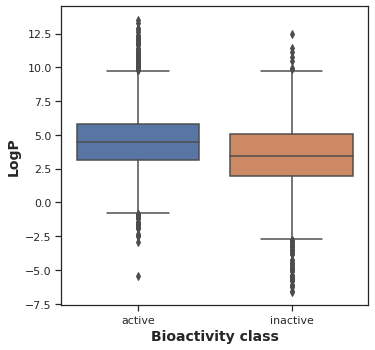

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = lipinski_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

#plt.savefig('plot_LogP.pdf')

In [46]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1939454.0,4.274959e-40,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHDonors')

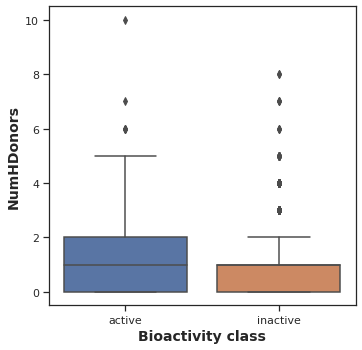

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = lipinski_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

# plt.savefig('plot_NumHDonors.pdf')

In [48]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1727167.5,6.331271e-11,0.05,Different distribution (reject H0)


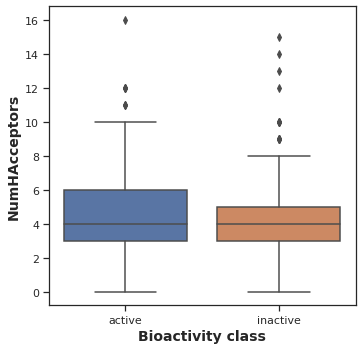

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = lipinski_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [50]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1682099.0,0.000002,0.05,Different distribution (reject H0)


<h3>Another way of simplifying the problem: active? True/False<h3>

In [51]:
# simplify the problem
y_train_activate = (y_train == 1)
y_test_activate = (y_test == 1)
y_train_activate

2314    False
3064     True
1824    False
1458     True
40      False
        ...  
2612    False
3130    False
4631    False
2756    False
345      True
Name: class, Length: 3756, dtype: bool

<h4>KNN Classifier</h4>

In [52]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn_clf, X_train, y_train_activate, cv=3)

array([0.6086262 , 0.58865815, 0.60702875])

<h4>SVM</h4>

In [53]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
cross_val_score(svm_clf, X_train, y_train_activate, cv=3)

array([0.59664537, 0.59185304, 0.59345048])

<h4>SGD Classifier</h4>

In [54]:
sgd_clf = SGDClassifier(random_state=42)
cross_val_score(sgd_clf, X_train, y_train_activate, cv=3, scoring='accuracy')

array([0.58546326, 0.46246006, 0.4384984 ])

<h4>Random Forest Classifier</h4>

In [55]:
from sklearn.model_selection import cross_val_predict

randForest_clf = RandomForestClassifier(random_state=42)
y_train_pred = cross_val_predict(randForest_clf, X_train, y_train_activate, cv=3)

<h3>Confusion Matrix</h3>

A better way to evaluate the performance of a classifier. It counts the number of times instaces of class A are classified as class B.

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_activate, y_train_pred)

array([[1616,  509],
       [ 609, 1022]])

[[true negatives, false positives], -negative class (inactive)<br>
[false negatives, true positives]]  -positive class (active)

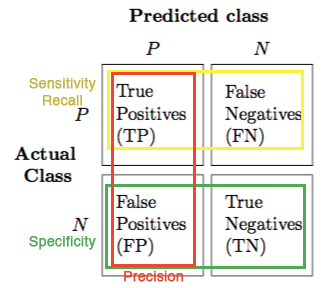

<h3>Precision and Recall</h3>

<ul>
    <li>Precision: TP / (TP + FP)</li>
    <li>Recall: TP / (TP + FN)</li>
</ul>

In [57]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_activate, y_train_pred))
print(recall_score(y_train_activate, y_train_pred))

0.6675375571521881
0.6266094420600858


The chances are the model detects an active molecule is 66.7%. Moreover, the model only detects 62.7% of the active molecules.

<h3>F1 score</h3>

F1 score is used to combine precision score and recall score together. A classifier will only get a high F1 score if both recall and precision are high. Note that F1 (harmonic mean) gives much more weight to low values.

In [59]:
from sklearn.metrics import f1_score
f1_score(y_train_activate, y_train_pred)

0.6464263124604681

<h3>The ROC Curve</h3>

It is very similar to the precision/recall curve. However, ROC curve plots the true positive rate(=recall) versus the false positive rate(1 - the true negative rate) instead.

In [64]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_activate, cv=3, method='predict_proba')

In [65]:
pd.DataFrame(y_probas_forest)

,0,1
0,0.750000,0.250000
1,0.010000,0.990000
2,0.930000,0.070000
3,0.620000,0.380000
4,0.595000,0.405000
...,...,...
3751,0.820833,0.179167
3752,0.950000,0.050000
3753,0.910000,0.090000
3754,0.700000,0.300000


In [70]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:, 1] # scores = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_activate, y_scores_forest)

In [71]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate(recall)', fontsize=16)
    plt.axis([0, 1, 0, 1])
    
# plot_roc_curve(fpr, tpr, label="Random Forest")
# plt.show()

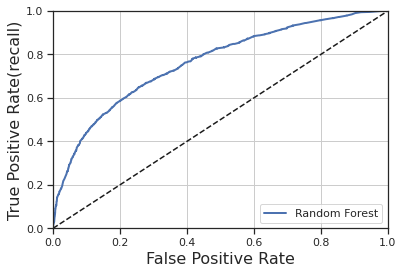

In [72]:
plot_roc_curve(fpr_forest, tpr_forest, label='Random Forest')
plt.legend(loc='lower right')
plt.show()

A good classifier stays as far away from the diagonal line as possible.
This model does not look so good.

<h4>ROC AUC</h4>

The area under the ROC curve. A good model has a high score (close to 1).

In [73]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_activate, y_scores_forest)

0.7619971868575757

<h4>KNN Classifier</h4>

In [74]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = [
   {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5, 7, 10, 15]}
]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 7, 10, 15],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
grid_search.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

1.1243309922728648 {'n_neighbors': 3, 'weights': 'uniform'}
1.0512737186027086 {'n_neighbors': 3, 'weights': 'distance'}
1.0910412433552177 {'n_neighbors': 4, 'weights': 'uniform'}
1.0427535527681675 {'n_neighbors': 4, 'weights': 'distance'}
1.098579215442733 {'n_neighbors': 5, 'weights': 'uniform'}
1.0358353414130135 {'n_neighbors': 5, 'weights': 'distance'}
1.099061843187314 {'n_neighbors': 7, 'weights': 'uniform'}
1.0396824506868152 {'n_neighbors': 7, 'weights': 'distance'}
1.1008713810189334 {'n_neighbors': 10, 'weights': 'uniform'}
1.0227677366356513 {'n_neighbors': 10, 'weights': 'distance'}
1.1052215055406773 {'n_neighbors': 15, 'weights': 'uniform'}
1.0201626640221058 {'n_neighbors': 15, 'weights': 'distance'}


<h4>SGD Classifier</h4>

In [77]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_activate, cv=3, method='decision_function')

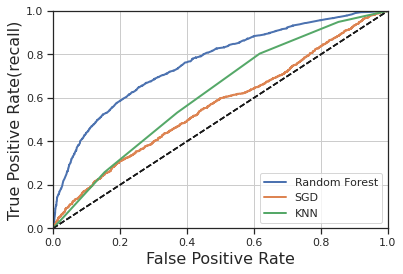

In [78]:
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_activate, y_scores_sgd)
y_probas_knn = cross_val_predict(knn_clf, X_train, y_train_activate, cv=3, method='predict_proba')
y_scores_knn = y_probas_knn[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_activate, y_scores_knn)

plot_roc_curve(fpr_forest, tpr_forest, label='Random Forest')
plot_roc_curve(fpr_sgd, tpr_sgd, label='SGD')
plot_roc_curve(fpr_knn, tpr_knn, label='KNN')
plt.legend(loc='lower right')
plt.show()

<h2>Train and Test the Model</h2>

<h4>Random Forest Classifier</h4>

In [80]:
forest_clf.fit(X_train, y_train_activate)

RandomForestClassifier(random_state=42)

<h3>Evaluate the model</h3>

In [81]:
y_pred = forest_clf.predict(X_test)
print(precision_score(y_test_activate, y_pred))
print(recall_score(y_test_activate, y_pred))

0.6675461741424802
0.6200980392156863


In [82]:
f1_score(y_test_activate, y_pred)

0.6429479034307497

<h2>Error Analysis</h2>

1) The prediciton of the random forest classifier is not accurate. <br>
<i>" Because all parameters can be easily computed, the Pfizer rule (or its variants) has become the most widely applied filter in virtual library design today. However, ... In fact, the Pfizer rule by itself appears to be a rather ineffective discriminator between drugs and non-drugs. Frimurer et al showed that using the above criteria, only 66% of the compounds in the MDL Drug Data Report (MDDR) database, ... were classified as drug-like "</i>
<br>
Madame Curie Bioscience Database by Gisbert Schneider [NCBI](https://www.ncbi.nlm.nih.gov/books/NBK6404/)

2) It seems that the model is underfitting. To predict how drug like a molecule is, we need more features.

<h2>Next Tasks</h2>

<ol>
    <li>Add more features: number of Rotatable bonds, logS and number of Aromatic rings</li>
    <li>Predict logS</li>
    <li>Analysis the importance of each feature and the correlation between the drug-likeness and features</li>
</ol>

<h2>References</h2>

<ul>
    <li>https://github.com/dataprofessor/bioinformatics_freecodecamp</li>
    <li>https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/</li>
    <li>https://www.ncbi.nlm.nih.gov/books/NBK6404/</li>
</ul>